# Homework 1: Applied Machine Learning Assignment

This assignment covers contents of the first three lectures.

We will be focusing on topics related to
1. Data Visualization and Analysis
2. Supervised Learning - Linear Regression, Logistic Regression, and SVM with Data Preprocessing.

### **Due Date is October 3, 11:59 PM.** 

## Name: Liwen Zhu
## UNI: lz2512

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score

In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [3]:
pd.options.mode.chained_assignment = None

# Task 1: Data Visualization and Analysis

"Now that's A LOT of data. Can you show me something I can understand?"

This question often arises when we see datasets with thousands of rows and want to understand the characteristics of data. 

Data visualization comes to our rescue!

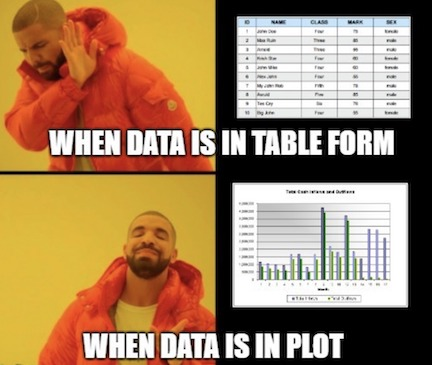


### We are going to use the credit-dataset for Task 1. 

**1.1 Plot the distribution of the features - credit_amount, age, and duration using a histogram.
Make sure to label your axes while plotting. [6 points]**



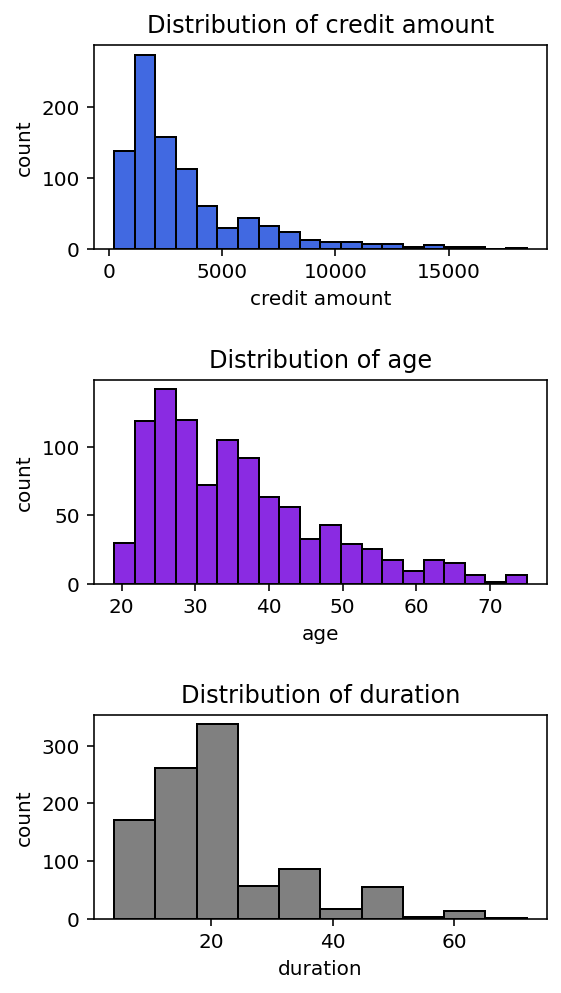

In [4]:
# YOUR CODE HERE
credit = pd.read_csv("dataset_credit.csv")
plt.figure(figsize=(4, 7),dpi=144)
plt.subplot(3,1,1)
plt.hist(credit["credit_amount"],bins = 20, color='royalblue',edgecolor = 'black')
plt.xlabel("credit amount")
plt.ylabel("count")
plt.title("Distribution of credit amount")
plt.tight_layout(h_pad =2)
plt.subplot(3,1,2)
plt.hist(credit["age"],bins = 20, color='blueviolet',edgecolor = 'black')
plt.xlabel("age")
plt.ylabel("count")
plt.title("Distribution of age")
plt.tight_layout(h_pad =2)
plt.subplot(3,1,3)
plt.hist(credit["duration"],bins = 10, color='grey',edgecolor = 'black')
plt.xlabel("duration")
plt.ylabel("count")
plt.title("Distribution of duration")
plt.tight_layout(h_pad =2)
plt.show()

**1.2 Plot the relationships between the features - class and credit_amount using box plots. Make sure to label the axes[4 points]**



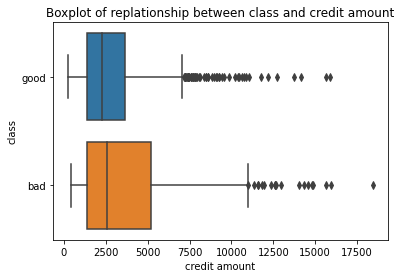

In [5]:
# Your code here
a = sns.boxplot(data = credit, y="class",x="credit_amount")
plt.xlabel("credit amount")
plt.ylabel("class")
plt.title("Boxplot of replationship between class and credit amount")
plt.show()

**1.3 Plot the distribution of label 'class' using a pie chart. Be sure to label correctly. What do you infer about the data and its distribution from all the plots? (1.1, 1.2, and 1.3)[5 points]**

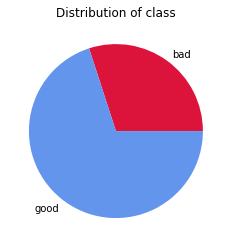

From 1.1, 1.2 and 1.3, I noticed that the distribution of credit amount and age both skewed to the right, such that most of the credit amount are below 5000 and age are below 40. The distribution of duration looks like skewed to right, and most of the duration are less than 25. The data has more "good" class than "bad" class. Both classes skewed to the right and have almost same value of Q1 and median. The "bad" class has higher Q3 than "good" class.


In [6]:
# Your code here
df = pd.DataFrame(credit)
one_three = df.groupby("class").size()
lab = ["bad","good"]
plt.pie(one_three,labels = lab,colors = ["crimson","cornflowerblue"])
plt.title("Distribution of class")
plt.show()
print("From 1.1, 1.2 and 1.3, I noticed that the distribution of credit amount and age both \
skewed to the right, such that most of the credit amount are below 5000 and age are below 40. \
The distribution of duration looks like skewed to right, and most of the duration are less than 25. \
The data has more \"good\" class than \"bad\" class. Both classes skewed to the right and have almost \
same value of Q1 and median. The \"bad\" class has higher Q3 than \"good\" class.")

# Task 2 : Linear Models for Regression and Classification

In this notebook, we will be implementing three linear models **linear regression, logistic regression, and SVM**. We will see that despite some of their differences at the surface, these linear models (and many machine learning models in general) are fundamentally doing the same thing - that is, optimizing model parameters to minimize a loss function on data.

## Part 1: Linear Regression

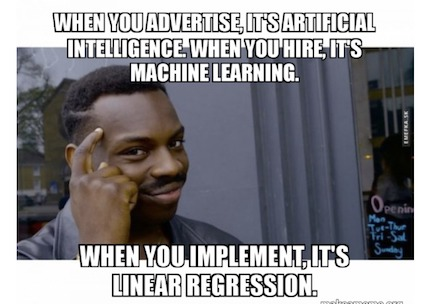

In part 1, we will use two datasets - synthetic and auto-mpg to train and evaluate our linear regression model.

The first dataset will be a synthetic dataset sampled from the following equations:

$ 𝜖 ∼ Normal(0,3) $

$ y = 5𝑥 + 10 + 𝜖 $

In [7]:
np.random.seed(0)
epsilon = np.random.normal(0, 3, 100)
x = np.linspace(0, 10, 100) 
# y = np.linspace(0, 5, 100)
y = 5 * x + 10 + epsilon

To apply linear regression, we need to first check if the assumptions of linear regression are not violated.

Assumptions of Linear Regression:

*   Linearity:  is a linear (technically affine) function of $x$.
*   Independence: the $x$'s are independently drawn, and not dependent on each other.
*   Homoscedasticity: the 𝜖's, and thus the $y$'s, have constant variance.
*   Normality: the 𝜖's are drawn from a Normal distribution (i.e. Normally-distributed errors)

These properties, as well as the simplicity of this dataset, will make it a good test case to check if our linear regression model is working properly.

**2.1.1 Plot y vs x in the synthetic dataset as a scatter plot. Label your axes and make sure your y-axis starts from 0. Do the features have linear relationship?[2 points]**

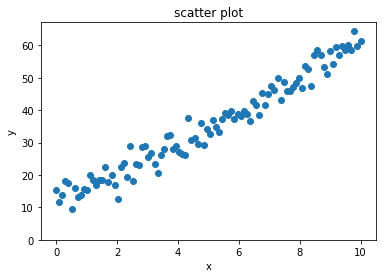

There is a linear relationship between x and y.


In [8]:
# Your code here
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("scatter plot")
plt.ylim(bottom = 0)
plt.show()
print("There is a linear relationship between x and y.")

The second dataset we will be using is an [auto MPG dataset](https://archive.ics.uci.edu/ml/datasets/Auto+MPG). This dataset contains various characteristics for around 400 cars. We will use linear regression to predict the mpg label from seven features (4 continuous, 3 discrete).

In [9]:
# Load auto MPG dataset
auto_mpg_df = pd.read_csv('auto-mpg.csv')

# drop some rows with missing entries
auto_mpg_df = auto_mpg_df[auto_mpg_df['horsepower'] != '?']

# Cast horsepower column to float
auto_mpg_df['horsepower'] = auto_mpg_df['horsepower'].astype(float)

auto_mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [10]:
# Split data into features and labels
auto_mpg_X = auto_mpg_df.drop(columns=['mpg'])
auto_mpg_y = auto_mpg_df['mpg']

**2.1.2 Plot the relationships between the label (mpg) and the continuous features (displacement, horsepower, weight, acceleration) using a small multiple of scatter plots. Make sure to label the axes.[4 points]**

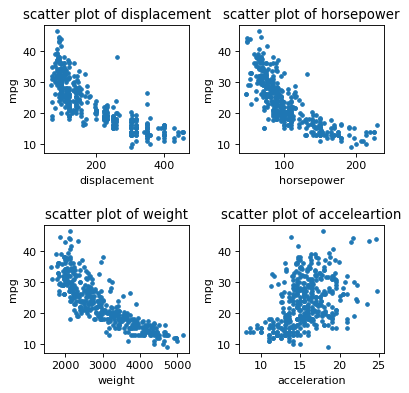

In [11]:
# Your code here
plt.figure(figsize=(5, 5),dpi=80)
plt.subplot(2,2,1)
plt.scatter(auto_mpg_X["displacement"],auto_mpg_y,s=10)
plt.xlabel("displacement")
plt.ylabel("mpg")
plt.title("scatter plot of displacement")
plt.tight_layout(pad =1, h_pad =2)
plt.subplot(2,2,2)
plt.scatter(auto_mpg_X["horsepower"],auto_mpg_y,s=10)
plt.xlabel("horsepower")
plt.ylabel("mpg")
plt.title("scatter plot of horsepower")
plt.tight_layout(pad = 1, h_pad =2)
plt.subplot(2,2,3)
plt.scatter(auto_mpg_X["weight"],auto_mpg_y,s=10)
plt.xlabel("weight")
plt.ylabel("mpg")
plt.title("scatter plot of weight")
plt.tight_layout(pad =1, h_pad =2)
plt.subplot(2,2,4)
plt.scatter(auto_mpg_X["acceleration"],auto_mpg_y,s=10)
plt.xlabel("acceleration")
plt.ylabel("mpg")
plt.title("scatter plot of acceleartion")
plt.tight_layout(pad =1, h_pad =2)
plt.show()

**2.1.3 Plot the relationships between the label (mpg) and the discrete features (cylinders, model year, origin) using a small multiple of box plots. Make sure to label the axes.[3 points]**

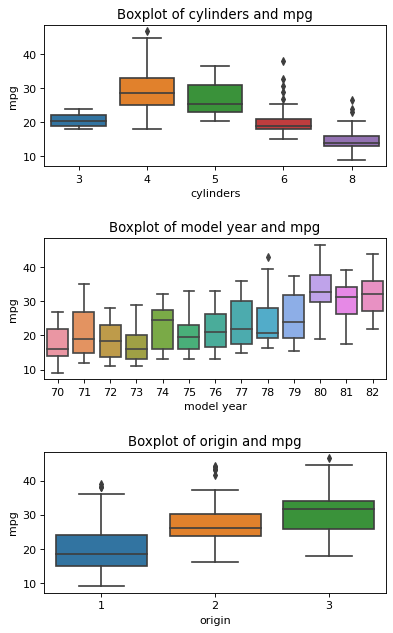

In [12]:
# Your code here
plt.figure(figsize=(5, 8),dpi=80)
plt.subplot(3,1,1)
sns.boxplot(y=auto_mpg_y,x=auto_mpg_X["cylinders"])
plt.xlabel("cylinders")
plt.ylabel("mpg")
plt.title("Boxplot of cylinders and mpg")
plt.tight_layout(pad =1, h_pad =2)
plt.subplot(3,1,2)
sns.boxplot(y=auto_mpg_y,x=auto_mpg_X["model year"])
plt.xlabel("model year")
plt.ylabel("mpg")
plt.title("Boxplot of model year and mpg")
plt.tight_layout(pad =1, h_pad =2)
plt.subplot(3,1,3)
sns.boxplot(y=auto_mpg_y,x=auto_mpg_X["origin"])
plt.xlabel("origin")
plt.ylabel("mpg")
plt.title("Boxplot of origin and mpg")
plt.tight_layout(pad =1, h_pad =2)
plt.show()

**2.1.4 From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not? Please explain.[2 points]**

In [13]:
# Your answer here 
print("I don't think linear regression is a good model for this problem. Linear regression is usually applied \
on continuous variables. It does not perform well on discrete varibale. In this probelm, there are three discrete \
variables which may affect the accuracy of the model.")

I don't think linear regression is a good model for this problem. Linear regression is usually applied on continuous variables. It does not perform well on discrete varibale. In this probelm, there are three discrete variables which may affect the accuracy of the model.


### Data Preprocessing

Before we can fit a linear regression model, there are several pre-processing steps we should apply to the datasets:
1. Encode categorial features appropriately.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices X_train, X_val, and X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from X_train, and apply it to X_train, X_val, and X_test.
4. Add a column of ones to the feature matrices X_train, X_val, and X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

The processing steps on the synthetic dataset have been provided for you below as a reference:


In [14]:
X = x.reshape((100, 1))   # Turn the x vector into a feature matrix X

# 1. No categorical features in the synthetic dataset (skip this step)

# 2. Split the dataset into training (60%), validation (20%), and test (20%) sets
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=0)

# 3. Standardize the columns in the feature matrices
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # Fit and transform scalar on X_train
X_val = scaler.transform(X_val)           # Transform X_val
X_test = scaler.transform(X_test)         # Transform X_test

# 4. Add a column of ones to the feature matrices
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

print(X_train[:5], '\n\n', y_train[:5])

[[ 1.          0.53651502]
 [ 1.         -1.00836082]
 [ 1.         -0.72094206]
 [ 1.         -0.25388657]
 [ 1.          0.64429705]] 

 [38.44273829 19.38966655 26.79105322 30.69326568 45.00432104]


**2.1.5 Apply the same processing steps on the auto MPG dataset.[3 points]**

In [15]:
# Load auto MPG dataset
auto_mpg_df = pd.read_csv('auto-mpg.csv')

# drop some rows with missing entries
auto_mpg_df = auto_mpg_df[auto_mpg_df['horsepower'] != '?']

# Cast horsepower column to float
auto_mpg_df['horsepower'] = auto_mpg_df['horsepower'].astype(float)

In [16]:
# Your code here
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
# 1. No categorical features in the synthetic dataset (skip this step)
# te = TargetEncoder(cols = ["model year"]).fit(auto_mpg_df,auto_mpg_df["mpg"])
# te.transform(auto_mpg_df)
# ohe_cy = OneHotEncoder()
# ohe_or = OneHotEncoder()
# cy_transformed = ohe_cy.fit_transform(auto_mpg_df[["cylinders"]])
# auto_mpg_df[["cylinders_3","cylinders_4","cylinders_5","cylinders_6","cylinders_8"]] = cy_transformed.toarray()
# or_transformed = ohe_or.fit_transform(auto_mpg_df[["origin"]])
# auto_mpg_df[["origin_1","origin_2","origin_3"]] = or_transformed.toarray()
# auto_mpg_df.drop(columns = ['cylinders','origin'],axis=1,inplace = True)

# 2. Split the dataset into training (60%), validation (20%), and test (20%) sets
auto_mpg_X = auto_mpg_df.drop(columns=['mpg'])

auto_mpg_y = auto_mpg_df['mpg'].tolist()

auto_mpg_X_dev, auto_mpg_X_test, auto_mpg_y_dev, auto_mpg_y_test = train_test_split(auto_mpg_X, auto_mpg_y, test_size=0.2, random_state=0)
auto_mpg_X_train, auto_mpg_X_val, auto_mpg_y_train, auto_mpg_y_val = train_test_split(auto_mpg_X_dev, auto_mpg_y_dev, test_size=0.25, random_state=0)

# 3. Standardize the columns in the feature matrices
scaler = StandardScaler()
auto_mpg_X_train = scaler.fit_transform(auto_mpg_X_train)   # Fit and transform scalar on X_train
auto_mpg_X_val = scaler.transform(auto_mpg_X_val)           # Transform X_val
auto_mpg_X_test = scaler.transform(auto_mpg_X_test)         # Transform X_test

# 4. Add a column of ones to the feature matrices
auto_mpg_X_train = np.hstack([np.ones((auto_mpg_X_train.shape[0], 1)), auto_mpg_X_train])
auto_mpg_X_val = np.hstack([np.ones((auto_mpg_X_val.shape[0], 1)), auto_mpg_X_val])
auto_mpg_X_test = np.hstack([np.ones((auto_mpg_X_test.shape[0], 1)), auto_mpg_X_test])

print(auto_mpg_X_train[:5], '\n\n', auto_mpg_y_train[:5])


[[ 1.          0.37998163  0.39492947  0.1100916   0.8241919   0.28262047
  -0.57603817 -0.77559006]
 [ 1.         -0.83804168 -0.97348359 -0.87531843 -1.20346504 -0.54674887
  -0.02809942  0.43433043]
 [ 1.          1.59800495  1.33761402  1.37704734  1.02260224 -1.159761
  -0.85000755 -0.77559006]
 [ 1.         -0.83804168 -0.5173459  -0.48115442 -0.53443504 -0.00585582
   1.34174745 -0.77559006]
 [ 1.         -0.83804168 -0.97348359 -1.49471902 -1.0244118   2.15771638
   1.06777808  0.43433043]] 

 [18.0, 29.0, 15.0, 27.2, 44.3]


At the end of this pre-processing, you should have the following vectors and matrices: 
- Syntheic dataset: X_train, X_val, X_test, y_train, y_val, y_test
- Auto MPG dataset: auto_mpg_X_train, auto_mpg_X_val, auto_mpg_X_test, auto_mpg_y_train, auto_mpg_y_val, auto_mpg_y_test

### Implement Linear Regression

Now, we can implement our linear regression model! Specifically, we will be implementing ridge regression, which is linear regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for linear regression is:

$$
y = X w
$$

Note that we can omit the bias term here because we have included a column of ones in our $X$ matrix, so the bias term is learned implicitly as a part of $w$. This will make our implementation easier.

Our objective in linear regression is to learn the weights $w$ which best fit the data. This notion can be formalized as finding the optimal $w$ which minimizes the following loss function:

$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

This is the ridge regression loss function. The $\| X w - y \|^2_2$ term penalizes predictions $Xw$ which are not close to the label $y$. And the $\alpha \| w \|^2_2$ penalizes large weight values, to favor a simpler, more generalizable model. The $\alpha$ hyperparameter, known as the regularization parameter, is used to tune the complexity of the model - a higher $\alpha$ results in smaller weights and lower complexity, and vice versa. Setting $\alpha = 0$ gives us vanilla linear regression.

Conveniently, ridge regression has a closed-form solution which gives us the optimal $w$ without having to do iterative methods such as gradient descent. The closed-form solution, known as the Normal Equations, is given by:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$

**2.1.6 Implement a `LinearRegression` class with two methods: `train` and `predict`.[8 points]**
You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.

In [17]:
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        None
        '''
        ### Your code here
        product = np.matmul(X.transpose(),X)
        aI = np.eye(len(y))* self.alpha
        for i in range(len(product)):  
            for j in range(len(product[0])):
                product[i][j] = product[i][j] + aI[i][j]
        xty = np.matmul(X.transpose(),y)
        self.w = np.matmul(np.linalg.inv(product),xty)
            
        
    def predict(self, X):
        '''Predicts on X using trained model.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) prediction vector
        '''
        ### Your code here
        return np.matmul(X,self.w)
        

### Train,  Evaluate, and Interpret Linear Regression Model

**2.1.7 Using your `LinearRegression` implementation above, train a vanilla linear regression model ($\alpha = 0$) on (X_train, y_train) from the synthetic dataset. Use this trained model to predict on X_test. Report the first 3 and last 3 predictions on X_test, along with the actual labels in y_test.[3 points]**

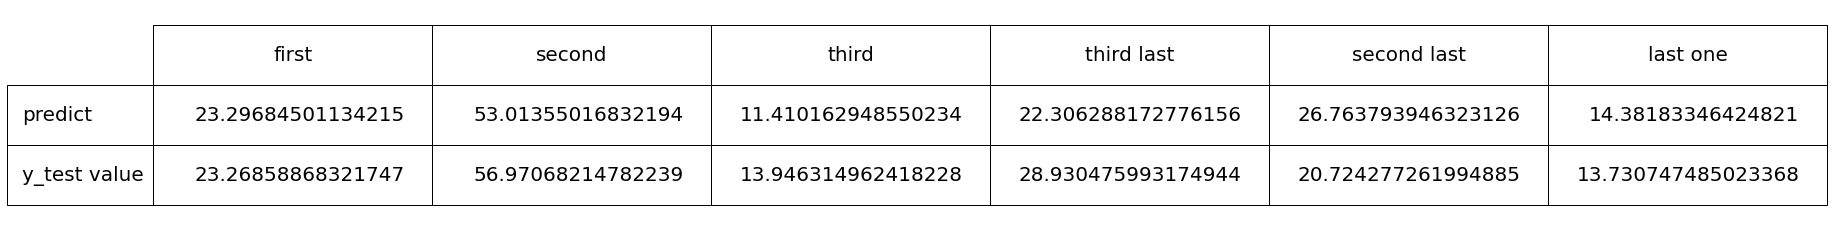

In [18]:
# Your code here
from sklearn.metrics import mean_squared_error
test = LinearRegression()
test.train(X_train, y_train)

arr_test = test.predict(X_test)
report_test = np.zeros(12).reshape(2,6)
for i in range(3):
    report_test[0][i]=arr_test[i]
    report_test[0][-1-i]=arr_test[-1-i]
    report_test[1][i]=y_test[i]
    report_test[1][-1-i]=y_test[-1-i]
    
table = plt.table(cellText=report_test,
                      rowLabels=['predict','y_test value'],
                      colLabels=['first','second','third','third last','second last','last one'],
                      loc='center')
table.set_fontsize(20)
table.scale(5, 5) 
plt.axis('off')
plt.show()

**2.1.8 Plot a scatter plot of y_test vs X_test (just the non-ones column). Then, using the weights from the trained model above, plot the best-fit line for this data on the same figure.[2 points]** If your line goes through the data points, you have likely implemented the linear regression correctly!

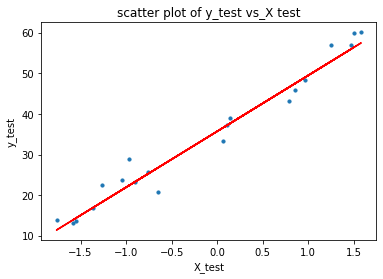

In [19]:
# Your code here
plt.scatter(X_test[:,1],y_test,s=10)
plt.plot(X_test[:,1],arr_test,'-r',label = 'predict line')
plt.xlabel("X_test")
plt.ylabel("y_test")
plt.title("scatter plot of y_test vs_X test")
plt.show()

**2.1.9 Train a linear regression model ($\alpha = 0$) on the auto MPG training data. Make predictions and report the mean-squared error (MSE) on the training, validation, and test sets. Report the first 3 and last 3 predictions on the test set, along with the actual labels.[4 points]**

Mean-squared error of training data set is 10.670584193330882.
Mean-squared error of validation data set is 12.944798748782679.
Mean-squared error of test data set is 10.881879498129626.


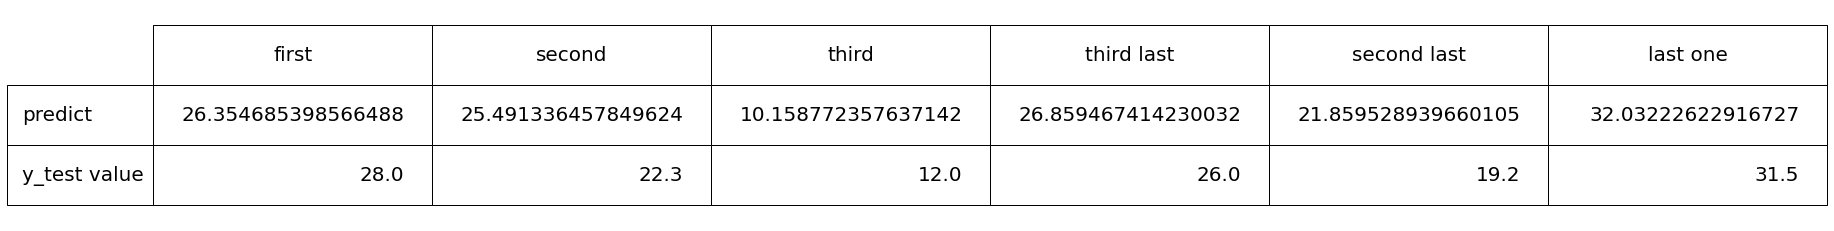

In [20]:
# Your code here
auto_mpg_lr = LinearRegression()
auto_mpg_lr.train(auto_mpg_X_train, auto_mpg_y_train)

arr_train = auto_mpg_lr.predict(auto_mpg_X_train)
mse_X_train = mean_squared_error(arr_train,auto_mpg_y_train)
print("Mean-squared error of training data set is "+ str(mse_X_train) + ".")

arr_val = auto_mpg_lr.predict(auto_mpg_X_val)
mse_X_val = mean_squared_error(arr_val,auto_mpg_y_val)
print("Mean-squared error of validation data set is "+ str(mse_X_val) + ".")

arr_test = auto_mpg_lr.predict(auto_mpg_X_test)
mse_X_test = mean_squared_error(arr_test,auto_mpg_y_test)
print("Mean-squared error of test data set is "+ str(mse_X_test) + ".")



arr = auto_mpg_lr.predict(auto_mpg_X_test)
report = np.zeros(12).reshape(2,6)
for i in range(3):
    report[0][i]=arr[i]
    report[0][-1-i]=arr[-1-i]
    report[1][i]=auto_mpg_y_test[i]
    report[1][-1-i]=auto_mpg_y_test[-1-i]
    
table = plt.table(cellText=report,
                      rowLabels=['predict','y_test value'],
                      colLabels=['first','second','third','third last','second last','last one'],
                      loc='center')
table.set_fontsize(20)
table.scale(5, 5) 
plt.axis('off')
plt.show()


**2.1.10 As a baseline model, use the mean of the training labels (auto_mpg_y_train) as the prediction for all instances. Report the mean-squared error (MSE) on the training, validation, and test sets using this baseline. [3 points]** This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression MSEs should be much lower than these baseline MSEs.

In [21]:
# Your code here
mean_y_train = np.mean(auto_mpg_y_train)
base_train = np.zeros(len(auto_mpg_X_train))+mean_y_train

base_train_X_mse = mean_squared_error(base_train,auto_mpg_y_train)

base_val = np.zeros(len(auto_mpg_X_val))+mean_y_train
base_val_X_mse = mean_squared_error(base_val,auto_mpg_y_val)

base_test = np.zeros(len(auto_mpg_X_test))+mean_y_train
base_test_X_mse = mean_squared_error(base_test,auto_mpg_y_test)

print("Mean-squared error of training data set is "+ str(base_train_X_mse) + ".")
print("Mean-squared error of validation data set is "+ str(base_val_X_mse) + ".")
print("Mean-squared error of testing data set is "+ str(base_test_X_mse) +  ".")

Mean-squared error of training data set is 60.56461465410184.
Mean-squared error of validation data set is 60.47988929483249.
Mean-squared error of testing data set is 62.4616051879408.


**2.1.11 Interpret your model trained on the auto MPG dataset using a bar chart of the model weights. [3 points]** Make sure to label the bars (x-axis) and don't forget the bias term!

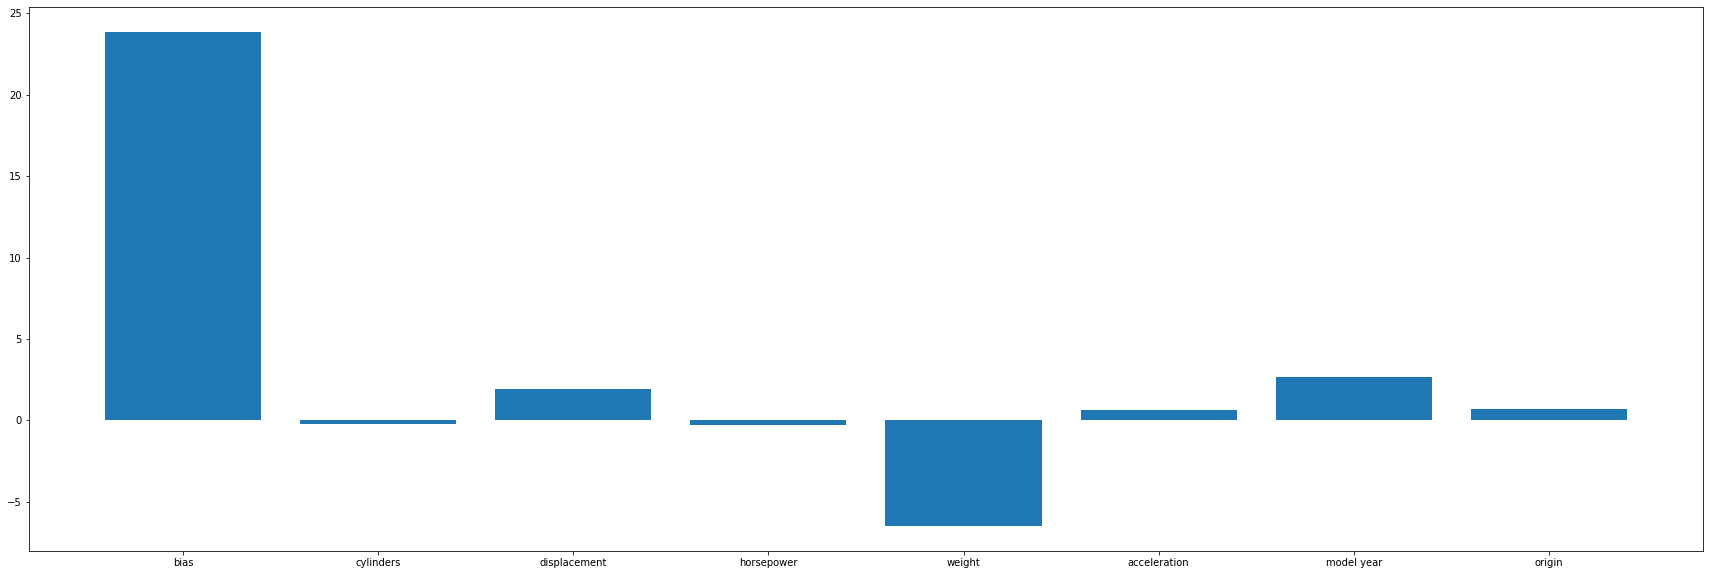

In [22]:
# Your code here
plt.figure(figsize=(30, 10))
label = auto_mpg_X.columns.tolist()
label.insert(0,"bias")
plt.bar(label,auto_mpg_lr.w)
plt.show()

**2.1.12 According to your model, which features are the greatest contributors to the MPG?[2 points]**

In [23]:
# Your answer here
print("Model year and displacement are the greatest contributors to the MPG")

Model year and displacement are the greatest contributors to the MPG


### Tune Regularization Parameter $\alpha$

Now, let's do ridge regression and tune the $\alpha$ regularization parameter on the auto MPG dataset.

**2.1.13 Sweep out values for $\alpha$ using alphas = np.logspace(-5, 1, 20. Perform a grid search over these $\alpha$ values, recording the training and validation MSEs for each $\alpha$. A simple grid search is fine, no need for k-fold cross validation. Plot the training and validation MSEs as a function of $\alpha$ on a single figure. Make sure to label the axes and the training and validation MSE curves. Use a log scale for the x-axis.[4 points]**

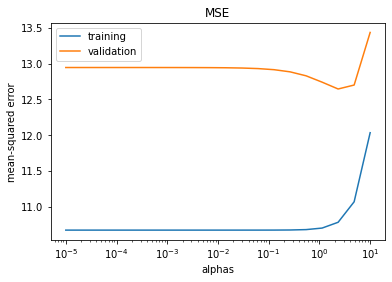

In [24]:
# Your code here
train_mse = []
val_mse = []
result = np.zeros(20).reshape(2,10)
alphas = np.logspace(-5, 1, 20)
i=0
for a in alphas:
    lr = LinearRegression(alpha = a)
    lr.train(auto_mpg_X_train, auto_mpg_y_train)
    lr_train = lr.predict(auto_mpg_X_train)
    mse_lr= mean_squared_error(lr_train,auto_mpg_y_train)
    lr_val = lr.predict(auto_mpg_X_val)
    mse_val= mean_squared_error(lr_val,auto_mpg_y_val)
    train_mse.append(mse_lr)
    val_mse.append(mse_val)
plt.plot(alphas,train_mse,label="training")
plt.plot(alphas,val_mse,label="validation")
plt.legend()
plt.xlabel("alphas")
plt.ylabel("mean-squared error")
plt.title("MSE")
plt.xscale("log")
plt.show()

**2.1.14 Explain your plot above. How do training and validation MSE behave with decreasing model complexity (increasing $\alpha$)?[ 2 points]**

In [25]:
# Your answer here
print("As alpha increases, MSE first maintain at a steady level. The validation's MSE drop down a little bit. \
Then, both suddenly increases dramatically.")

As alpha increases, MSE first maintain at a steady level. The validation's MSE drop down a little bit. Then, both suddenly increases dramatically.


## Part 2: Logistic Regression

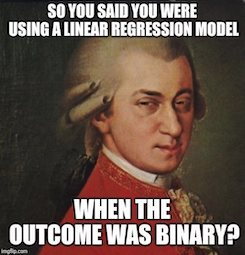






**In this part we would use Logistic Regression on NBA rookie stats to predict if player will last 5 years in league**

Class variable represent:
y = 0 if career years played < 5
y = 1 if career years played >= 5


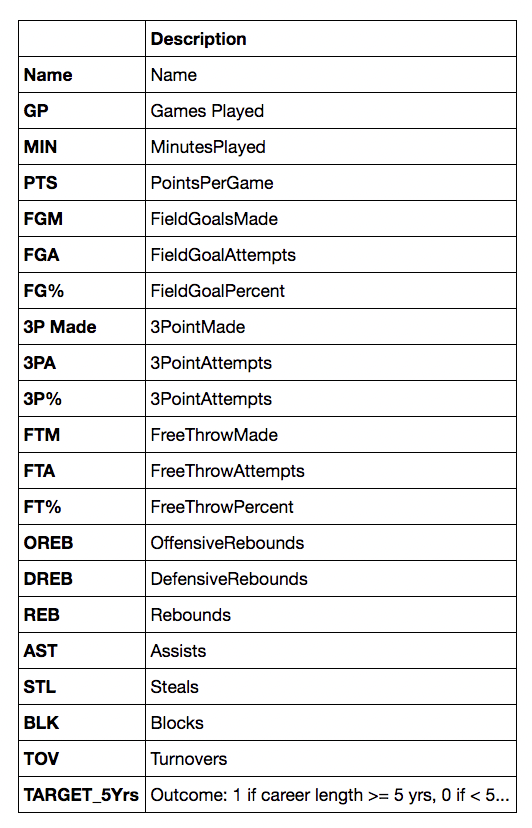

In [26]:
nba_reg = pd.read_csv("nba_logreg.csv")
nba_reg.head()
nba_reg.shape

(1340, 21)

#### Missing Value analysis

**2.2.1 Are there any missing values in the dataset? If so, what can be done about it? (Think if removing is an option?)
(Note: Name your dataset as nba_reg_new after removing NAs) [2 points]**

In [27]:
# Your code here 
# Check if there are missing values in the dataset
print("Check if there are any null values:")
print(nba_reg.isnull().any())
print("There are "+ str(nba_reg.isnull().sum().sum())+" missing values. We can drop the rows since there are 1340 samples.")

Check if there are any null values:
Name           False
GP             False
MIN            False
PTS            False
FGM            False
FGA            False
FG%            False
3P Made        False
3PA            False
3P%             True
FTM            False
FTA            False
FT%            False
OREB           False
DREB           False
REB            False
AST            False
STL            False
BLK            False
TOV            False
TARGET_5Yrs    False
dtype: bool
There are 11 missing values. We can drop the rows since there are 1340 samples.


In [28]:
# Your Code here
nba_reg_new = nba_reg.dropna()

**2.2.2 Do you think that the distribution of labels is balanced? Why/why not? 
Hint: Find the probability of the different categories.[3 points]**

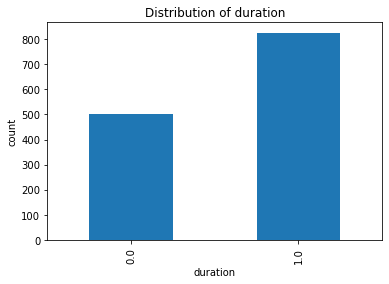

The probability of a player will last at least five years is 62.15% comparing to 37.85% of lasting less than five years. If the data is balanced, each should be 50%. However, the actual value is far from the expected number. Thus, the distribution is not balanced.


In [29]:
# Your code here
dist = nba_reg_new.groupby(by="TARGET_5Yrs").size()
dist.plot.bar()
plt.xlabel("duration")
plt.ylabel("count")
plt.title("Distribution of duration")
plt.show()
print("The probability of a player will last at least five years is " + str(np.round(100*dist[1]/(dist[0]+dist[1]),2))
      +"% comparing to "+ str(np.round(100*dist[0]/(dist[0]+dist[1]),2))+"% of lasting less than five years. If the \
data is balanced, each should be 50%. However, the actual value is far from the expected number. Thus, the \
distribution is not balanced.")

In [30]:
nba_X = nba_reg_new.drop(columns=['TARGET_5Yrs'])
nba_y = nba_reg_new['TARGET_5Yrs']
print(nba_X.shape)

(1329, 20)


**2.2.3 Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop those highly correlated features from the dataframe. Why is necessary to drop those columns before proceeding further?[4 points]**

In [31]:
# Your code here
nba_X.corr()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
GP,1.000000,0.590596,0.539069,0.543000,0.517395,0.296987,0.108195,0.099626,0.038209,0.483185,0.480136,0.197743,0.400184,0.467467,0.460390,0.374311,0.452726,0.276700,0.518693
MIN,0.590596,1.000000,0.911746,0.902864,0.910194,0.208341,0.389474,0.402814,0.165997,0.791089,0.779813,0.236160,0.573655,0.747065,0.710853,0.629147,0.757050,0.401011,0.826431
PTS,0.539069,0.911746,1.000000,0.990874,0.979676,0.261587,0.345289,0.355198,0.151072,0.896245,0.880826,0.254404,0.576421,0.696560,0.679002,0.551561,0.674937,0.390496,0.850272
FGM,0.543000,0.902864,0.990874,1.000000,0.980117,0.297113,0.287956,0.297898,0.119493,0.848146,0.840667,0.219423,0.597468,0.705191,0.692678,0.532261,0.662457,0.400744,0.834343
FGA,0.517395,0.910194,0.979676,0.980117,1.000000,0.135815,0.388860,0.412053,0.197160,0.826244,0.805507,0.264405,0.505547,0.642752,0.616497,0.589038,0.689771,0.325503,0.845952
FG%,0.296987,0.208341,0.261587,0.297113,0.135815,1.000000,-0.291573,-0.347680,-0.330690,0.253381,0.306360,-0.150996,0.512346,0.411103,0.466126,-0.103546,0.061130,0.390786,0.126429
3P Made,0.108195,0.389474,0.345289,0.287956,0.388860,-0.291573,1.000000,0.982579,0.589855,0.155717,0.093059,0.312256,-0.218210,0.018688,-0.070865,0.374314,0.305146,-0.155955,0.257015
3PA,0.099626,0.402814,0.355198,0.297898,0.412053,-0.347680,0.982579,1.000000,0.582337,0.170463,0.105784,0.320901,-0.231050,0.013611,-0.079111,0.408066,0.336757,-0.169245,0.282496
3P%,0.038209,0.165997,0.151072,0.119493,0.197160,-0.330690,0.589855,0.582337,1.000000,0.030320,-0.032333,0.326372,-0.288759,-0.122949,-0.191071,0.262120,0.194329,-0.242274,0.108277
FTM,0.483185,0.791089,0.896245,0.848146,0.826244,0.253381,0.155717,0.170463,0.030320,1.000000,0.980626,0.253125,0.586325,0.657652,0.657194,0.474403,0.599534,0.412565,0.804762


In [32]:
print("When we are doing regression, we are trying to find how the change in x will impact on y keeping other variable \
the same. However, if the variables are highly correlated, as we change x, other factor will also change")

When we are doing regression, we are trying to find how the change in x will impact on y keeping other variable the same. However, if the variables are highly correlated, as we change x, other factor will also change


**Separating Features & Y variable from the processed dataset**

**Please note to replace the dataframe below with the new dataframe created after removing highly correlated features**

In [33]:
# Split data into features and labels
# nba_X[['FG%','3P%','FT%','AST','STL','BLK','TOV']]
nba_new_X = nba_reg_new.drop(columns=['TARGET_5Yrs','Name','MIN','PTS','FGM','3P Made','FTM','OREB', 'DREB'])
nba_new_Y = nba_reg_new['TARGET_5Yrs'].tolist()
print(nba_new_X.columns)

Index(['GP', 'FGA', 'FG%', '3PA', '3P%', 'FTA', 'FT%', 'REB', 'AST', 'STL',
       'BLK', 'TOV'],
      dtype='object')


**2.2.4 Apply the following pre-processing steps:[5 points]**

1) Use OrdinalEncoding to encode the label in the dataset (male & female)

2) Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.

3)Split the dataset into training (60%), validation (20%), and test (20%) sets.

4) Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.

5) Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [34]:
# Your code here
# 2
label = np.array(nba_new_X.columns)

# 3
nba_X_dev, nba_X_test, nba_y_dev, nba_y_test = train_test_split(nba_new_X, nba_new_Y, test_size=0.2, random_state=0)
nba_X_train, nba_X_val, nba_y_train, nba_y_val = train_test_split(nba_X_dev, nba_y_dev, test_size=0.25, random_state=0)

#4
scaler = StandardScaler()
nba_X_train = scaler.fit_transform(nba_X_train)   # Fit and transform scalar on X_train
nba_X_val = scaler.transform(nba_X_val)           # Transform X_val
nba_X_test = scaler.transform(nba_X_test)

#5
nba_X_train = np.hstack([np.ones((nba_X_train.shape[0], 1)), nba_X_train])
nba_X_val = np.hstack([np.ones((nba_X_val.shape[0], 1)), nba_X_val])
nba_X_test = np.hstack([np.ones((nba_X_test.shape[0], 1)), nba_X_test])

print(nba_X_train[:5], '\n\n', nba_y_train[:5])

[[ 1.         -1.48913775 -0.86620958  0.01701646 -0.65680752 -1.21292007
  -0.61894802  0.67806621 -0.55267571 -0.82128859 -0.29808189 -0.38002379
  -0.83130796]
 [ 1.          0.08268524 -0.7289156  -0.09667796 -0.7499858  -1.21292007
  -0.54596362  0.35942307 -0.55267571 -0.82128859 -1.27674827 -0.60078105
  -0.83130796]
 [ 1.          0.1409009  -0.45432765  2.1609685  -0.7499858  -1.21292007
   0.0379116  -1.58230859  1.30088699 -0.60478351 -0.78741508  0.06149073
  -0.55478357]
 [ 1.         -2.65345107 -0.94858597 -2.79286007 -0.7499858  -1.21292007
  -0.76491683 -0.42722719 -0.7427847  -0.74912023 -1.27674827 -0.60078105
  -0.27825917]
 [ 1.         -0.26660876 -1.03096235  1.65746461 -0.7499858  -1.21292007
  -0.47297922 -1.12425907 -0.17245772 -0.9656253  -1.03208168  0.28224799
  -0.83130796]] 

 [0.0, 1.0, 0.0, 0.0, 1.0]


### Implement Logistic Regression

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
> 
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


**A LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid has been implemented for you below.**

In [35]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0, t=100, eta=1e-3):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''
        
        loss = list()
        self.w = np.zeros((X.shape[1],1))
        for i in range(self.t): 
            self.w = self.w - (self.eta * self.calculate_gradient(X, y))
            loss.append(self.calculate_loss(X, y))
        return loss
        
    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold 
        the predicted probability to return a 0 or 1 prediction.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        y_pred = self.calculate_sigmoid(X.dot(self.w))
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred
    
    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w, 
        and alpha. Useful as a helper function for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        return -y.T.dot(np.log(self.calculate_sigmoid(X.dot(self.w)))) - (1-y).T.dot(np.log(1-self.calculate_sigmoid(X.dot(self.w)))) + self.alpha*np.linalg.norm(self.w, ord=2)**2

    
    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss 
        using X, y, w, and alpha. Useful as a helper function 
        for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        return X.T.dot(self.calculate_sigmoid( X.dot(self.w)) - y) + 2*self.alpha*self.w        
            
    
    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x. 
        Useful as a helper function for predict(), calculate_loss(), 
        and calculate_gradient().
        
        Parameters
        ----------
        x: (m x 1) vector
        
        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        return (1)/(1 + np.exp(-x.astype('float')))

**2.2.6 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.[6 points]**

A: Using your implementation above, train a logistic regression model **(alpha=0, t=100, eta=1e-3)** on the voice recognition training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge.[2 points] 

B: Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)[ 3 points]**, find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.

C. Compare accuracy on the test dataset for both the scenarios.[1 point]

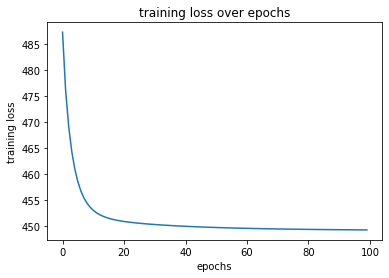

In [36]:
# Your code here 
# Part A
Log_Reg = LogisticRegression()
loss = Log_Reg.train(nba_X_train, np.array(nba_y_train).reshape(-1,1))
vector = np.zeros(len(loss))
for i in range(len(loss)):
    vector[i] = loss[i][0]
plt.plot(vector)
plt.xlabel("epochs")
plt.ylabel("training loss")
plt.title("training loss over epochs")
plt.show()

In [37]:
# Part B and C
import random
alphas = np.linspace(0.001,0.9,20)
ts = np.arange(1,80,4)
etas = np.linspace(0.00001,0.001,20)
best_score = 0
for i in range(20):
    Log_Reg_i = LogisticRegression(alpha=alphas[i], t=ts[i], eta=etas[i])
    Log_Reg_i.train(nba_X_train, np.array(nba_y_train).reshape(len(nba_X_train),1))
    score = accuracy_score(Log_Reg_i.predict(nba_X_val),nba_y_val)
    if score>best_score: 
#         best_score = score
        best_alpha = random.random() 
        best_t = random.randint(0, 100)
        best_eta = random.random()*0.0001
Log_Reg_best = LogisticRegression(alpha=best_alpha, t=best_t, eta=best_eta)
Log_Reg_best.train(nba_X_train, np.array(nba_y_train).reshape(len(nba_X_train),1))
best_score = accuracy_score(Log_Reg_best.predict(nba_X_test),nba_y_test)
print("The best hyperparameters I find are alpha = "+ str(best_alpha) +", t = " + str(best_t) 
      + ", and eta = " + str(best_eta) +". They get a score of "+ str(best_score)+". The score received in Part A is "
     + str(accuracy_score(Log_Reg.predict(nba_X_test),nba_y_test))
      +". The hyperparameters in Part B perform worse than Part A. The hyperparameters in part A is better than part B.")

The best hyperparameters I find are alpha = 0.9995079171496938, t = 46, and eta = 7.498967856346378e-05. They get a score of 0.7330827067669173. The score received in Part A is 0.7368421052631579. The hyperparameters in Part B perform worse than Part A. The hyperparameters in part A is better than part B.


### Feature Importance

**2.2.7 Interpret your trained model using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term![2 points]**

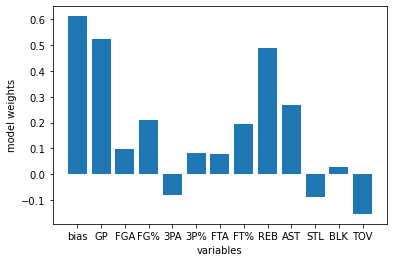

Games Played and Rebounds are the greatest contributors to determine whether a player can last in NBA for more than five years. On the other hand, the number of three point attempts, steals, and turnovers have a negative impact.


In [38]:
# Your code here
# plt.figure(figsize=(30, 10))
label_nba = nba_new_X.columns.tolist()
label_nba.insert(0,"bias")
w = []
for i in range(len(Log_Reg.w)):
    w.append(float(Log_Reg.w[i]))
plt.bar(label_nba, w)
plt.xlabel("variables")
plt.ylabel("model weights")
plt.show()
print("Games Played and Rebounds are the greatest contributors to determine whether a player can last in NBA \
for more than five years. On the other hand, the number of three point attempts, steals, \
and turnovers have a negative impact.")


# **Part 3: Support Vector Machines**

In this part, we will be using a breast cancer dataset for classification. 

Given 30 continuous features describing the nuclei of cells in a digitized image of a fine needle aspirate (FNA) of a breast mass, we will train SVM models to classify each sample as benign (B) or malignant (M).

In [39]:
cancer_df = pd.read_csv('breast-cancer.csv')
cancer_df = cancer_df.drop(columns=['id', 'Unnamed: 32'])
cancer_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [40]:
# Split data into features and labels
cancer_X = cancer_df.drop(columns=['diagnosis'])
cancer_y = cancer_df['diagnosis']

**The following pre-processing steps have been applied to the breast cancer dataset in the next cell:**

1. Encode the categorical label as 0 (B) or 1 (M).
2. Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model (certain broadcasting operations may fail unexpectedly).
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices cancer_X_train, cancer_X_val, and cancer_X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from cancer_X_train, and apply it to cancer_X_train, cancer_X_val, and cancer_X_test.
4. Add a column of ones to the feature matrices cancer_X_train, cancer_X_val, and cancer_X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.


In [41]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

cancer_df['diagnosis'] = cancer_df.diagnosis.astype("category").cat.codes
cancer_y_enc = cancer_df['diagnosis'].to_numpy()
cancer_y_enc = cancer_y_enc.reshape(cancer_y_enc.shape[0],1)
print(cancer_y_enc.shape)
print(type(cancer_y_enc))


cancer_X_dev, cancer_X_test, cancer_y_dev, cancer_y_test = train_test_split(cancer_X, cancer_y_enc, test_size=0.2, random_state=0)
cancer_X_train, cancer_X_val, cancer_y_train, cancer_y_val = train_test_split(cancer_X_dev, cancer_y_dev, test_size=0.25, random_state=0)


scaler = StandardScaler()
cancer_X_train = scaler.fit_transform(cancer_X_train) 
cancer_X_val = scaler.transform(cancer_X_val)
cancer_X_test = scaler.transform(cancer_X_test)


cancer_X_train = np.hstack([np.ones((cancer_X_train.shape[0], 1)), cancer_X_train])
cancer_X_val = np.hstack([np.ones((cancer_X_val.shape[0], 1)), cancer_X_val])
cancer_X_test = np.hstack([np.ones((cancer_X_test.shape[0], 1)), cancer_X_test])


(569, 1)
<class 'numpy.ndarray'>


### Train Primal SVM
**3.1 Train a primal SVM (with default parameters) on the breast cancer training data. Make predictions and report the accuracy on the training, validation, and test sets.[5 points]**

In [42]:
# Your code here
lsvc = LinearSVC(dual = False)
lsvc.fit(cancer_X_train, np.ravel(cancer_y_train))

primal_train = lsvc.predict(cancer_X_train)
ptr = accuracy_score(primal_train,cancer_y_train)
print("The accuracy score of train is " + str(ptr))

primal_val = lsvc.predict(cancer_X_val)
pv = accuracy_score(primal_val,cancer_y_val)
print("The accuracy score of validation is " + str(pv))

primal_test = lsvc.predict(cancer_X_test)
pte = accuracy_score(primal_test,cancer_y_test)
print("The accuracy score of test is " + str(pte))

The accuracy score of train is 0.9912023460410557
The accuracy score of validation is 0.9298245614035088
The accuracy score of test is 0.9473684210526315


### Train Dual SVM
**3.2 Train a dual SVM (with default parameters) on the breast cancer training data. Make predictions and report the accuracy on the training, validation, and test sets.[5 points]**

In [43]:
# Your code here
svc = SVC(kernel='linear')
svc.fit(cancer_X_train, np.ravel(cancer_y_train))

dual_train = svc.predict(cancer_X_train)
dtr = accuracy_score(dual_train,cancer_y_train)
print("The accuracy score of train is " + str(dtr))

dual_val = svc.predict(cancer_X_val)
dv = accuracy_score(dual_val,cancer_y_val)
print("The accuracy score of validation is " + str(dv))

dual_test = svc.predict(cancer_X_test)
dte = accuracy_score(dual_test,cancer_y_test)
print("The accuracy score of test is " + str(dte))

The accuracy score of train is 0.9912023460410557
The accuracy score of validation is 0.9473684210526315
The accuracy score of test is 0.9649122807017544
